## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Итак, наша цель - выделить характеристики потенциально успешных игр для продажи в 2017 в нашем интернет-магазине.

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv('/datasets/games.csv')

In [2]:
df.info()
display(df.sample(10, random_state=1))
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.00,Misc,0.00,0.00,0.03,0.00,nan,NaN,NaN
14043,Nobunaga's Ambition II,3DS,2015.00,Strategy,0.00,0.00,0.04,0.00,nan,NaN,NaN
3158,Up,DS,2009.00,Action,0.30,0.27,0.00,0.07,nan,tbd,E
22,Super Mario Bros. 3,NES,1988.00,Platform,9.54,3.44,3.84,0.46,nan,NaN,NaN
110,Mario Kart 8,WiiU,2014.00,Racing,3.15,2.15,1.28,0.51,88.00,9.1,E
1988,ATV: Quad Power Racing,PS,2000.00,Racing,0.58,0.39,0.00,0.07,42.00,tbd,E
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,1997.00,Misc,0.00,0.00,0.22,0.00,nan,NaN,NaN
8849,Derby Stallion 64,N64,2001.00,Sports,0.00,0.00,0.15,0.00,nan,NaN,NaN
14602,Star Wars: The Force Unleashed II,PC,2010.00,Action,0.03,0.00,0.00,0.00,59.00,5.8,T
106,Tekken 3,PS,1998.00,Fighting,3.27,2.22,1.40,0.29,96.00,9.1,T


0


In [3]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
Name,0.01
Platform,0
Year_of_Release,1.61
Genre,0.01
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,51.32
User_Score,40.09


*Вывод*

Первичный осмотр данных показал отсутствие дубликатов, название столбцов написано заглавными буквами - их нужно будет поменять на строчные буквы.
Тип данных - дату нужно будет привести в корректый формат, данные по оценкам пользователей изучить подробнее, так как их тип отображается не как вещественный (float), а как объектный (object). Там имеется значение "tbd".

Пропуски - название игры, год выпуска и жанр имеют очень низкое количество пропусков, которое будет некритичным удалить.
Информация же по оценкам экспертов, и рейтингу имеет более 40% пропусков, а по оценкам пользователей 50%. Отсутвие оценок экспертов и пользователей по всем играм, может быть вызвано тем, что было недостаточно оценок для получение тоговой или, возможно, они вообще отсутствовали по некоторым играм. Что касается рейтинга -  ESRB (Entertainment Software Rating Board) начала существование в 1994 году, возможно, игры до этой даты не были оценены. Также, возможно, были проблемы с выгрузкой данных.

## Подготовка данных

### Шаг 2. Подготовьте данные
Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [4]:
df.columns= df.columns.str.lower()

In [5]:
df=df.dropna(subset=['name']) # удалим строки где нет названия, мы не можем их заменить, и их всего две

In [6]:
df=df.dropna(subset=['year_of_release']) # удалим строки где нет года, мы не можем их заменить, и их всего 11

In [7]:
df['year_of_release']=pd.to_datetime(df['year_of_release'], format='%Y') # преобразуем данные по году в формат даты
#df['year_of_release'] = df['year_of_release'].dt.to_period('Y')
#df['year_of_release']=pd.DatetimeIndex(df['year_of_release']).year # оставим год

In [8]:
# Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
#  или можно было сделать сразу так
df['user_score']=pd.to_numeric(df['user_score'], errors='coerce')

tbd встречается в user_score, это скорее всего означает, что было недостаточно оценок пользователей, чтобы вывести рейтинг (меньше установленного минимума). Поэтому в данном случае мы можем заменить их на NaN - т.е. это отсутсвие информации по рейтингу.

In [9]:
# Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
df['total_sales']= df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales'] 

In [10]:
# заменим пропуски в колонке rating на undefined (или неизвестен)
df['rating'] = df['rating'].fillna('undefined')

*Вывод*

Данные готовы для работы: мы удалили 13 строк из изначального датасета, поменяли NaN на undefined а рейтинге, заменили tbd в оценках пользователей на NaN - посчитав это аналогичным отсутсвию информации по рейтингу. NaN остались только в колонках critic_score и user_score. Тип данных в случае даты и оценки пользователей заменен на корректный.

## исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

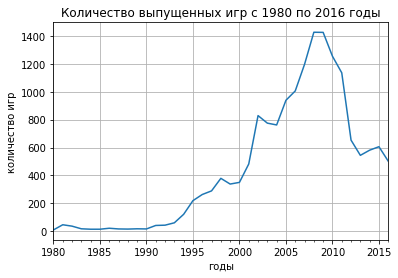

In [11]:
df.groupby('year_of_release')['name'].agg(['count']).plot(
    grid=True, title="Количество выпущенных игр с 1980 по 2016 годы", legend=False
)
plt.xlabel('годы')
plt.ylabel('количество игр')
plt.show()

На графике видно, что с 1980 по 1990 количество игр мало и практически не менялось, и рост начинается с 1995 года (200 игр) и набирает оборот к 2002 году (800 игр). Пик роста игра приходится на 2008-2009 годы (около 1400 игр), потом наблюдается спад до 2013 года и до конца периода (неполный 2016 год) находится на уровне 600 игр.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [12]:
top_platforms=df.pivot_table(
    index='platform', values='total_sales',aggfunc=('sum')).sort_values(by = 'total_sales', ascending=False).head(10)
top_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


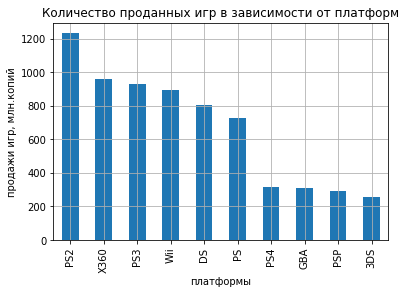

In [13]:
top_platforms.plot.bar(grid=True, title="Количество проданных игр в зависимости от платформ", legend=False
)
plt.xlabel('платформы')
plt.ylabel('продажи игр, млн.копий')
plt.show()

In [14]:
sales_by_platform = df.pivot_table(index=['platform','year_of_release'], values='total_sales') #общая таблица 
sales_by_top_platform = sales_by_platform.query('platform in @top_platforms.index')
sales_by_top_platform

total_sales
platform year_of_release             
3DS      2011-01-01              0.54
         2012-01-01              0.55
         2013-01-01              0.62
         2014-01-01              0.55
         2015-01-01              0.32
...                               ...
X360     2012-01-01              0.94
         2013-01-01              1.18
         2014-01-01              0.55
         2015-01-01              0.34
         2016-01-01              0.12

[97 rows x 1 columns]

In [15]:
sales_by_top_platform = sales_by_top_platform.reset_index()

In [16]:
top_platforms=top_platforms.reset_index()

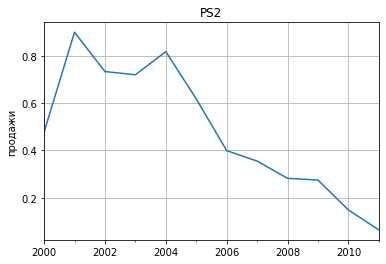

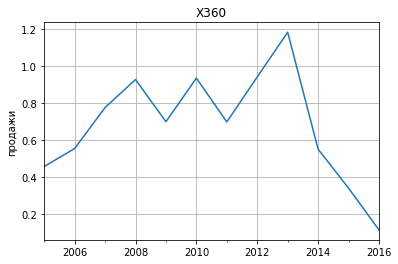

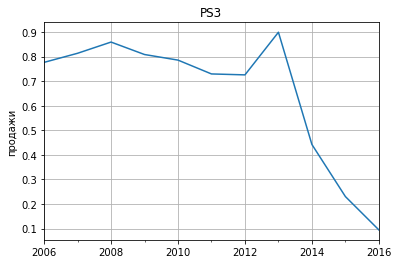

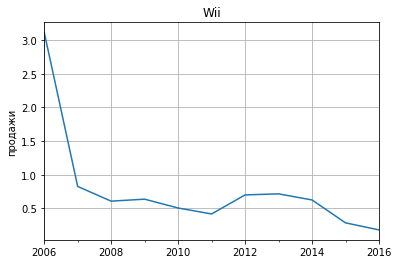

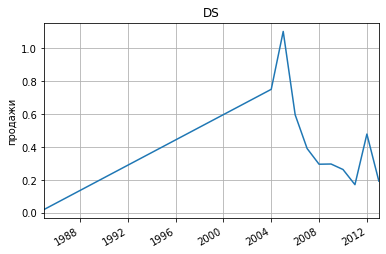

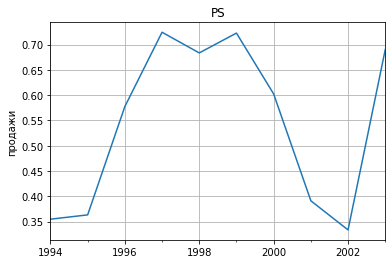

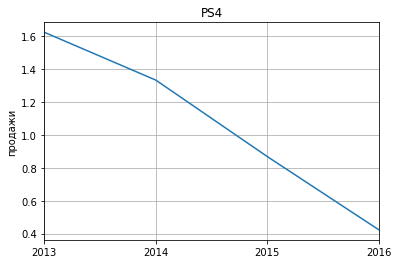

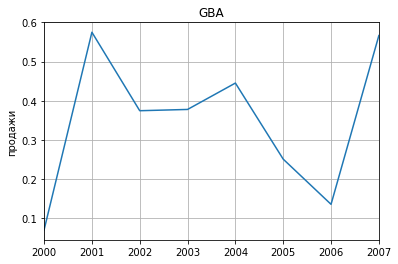

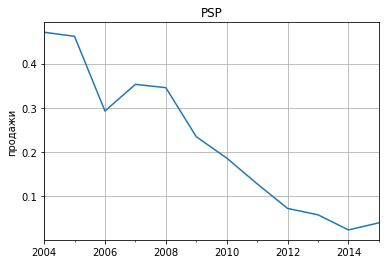

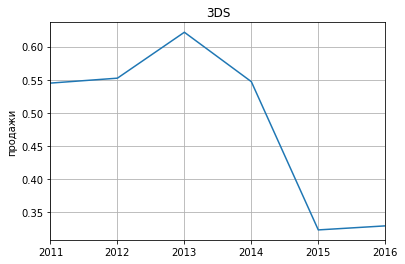

In [17]:
for top_platform in top_platforms['platform']:    
    sales_by_top_platform[sales_by_top_platform['platform'] == top_platform].pivot_table(
        index=['year_of_release'], values='total_sales').plot(grid=True, title=(top_platform), legend=False)
    plt.xlabel('')
    plt.ylabel('продажи')
    plt.show()

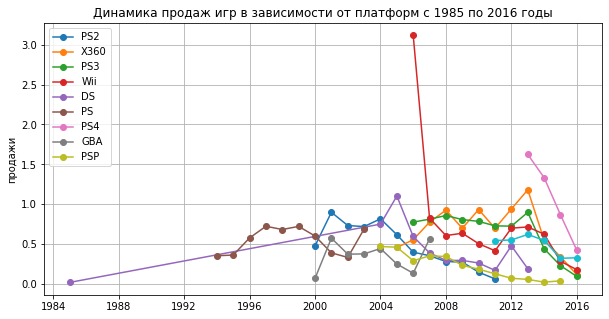

In [18]:
plt.figure(figsize=(10,5))
plt.grid()

for top_platform in top_platforms['platform']:
        plt.legend(top_platforms['platform'])
        plt.plot(sales_by_top_platform[sales_by_top_platform['platform'] == top_platform].pivot_table(
        index=['year_of_release'], values='total_sales'),marker='o')
plt.xlabel('')
plt.ylabel('продажи')
plt.title('Динамика продаж игр в зависимости от платформ с 1985 по 2016 годы')
plt.show()

На графиках по десяти платформам - лидерам продаж, мы видим, что их жизненный цикл составил 9-11 лет.  Исключением стала DS, цикл которой гораздо больше, т.к. данные о продажах есть с 1985 по 2011 год*). 

Как правило, в первой половине цикла продажи выше, т.е. платформа переживает свой взлет, а последние годы просиходит, падение спад продаж. Хотя, некоторые платформы в последний год демонстрирую некий "рывок", т.е. взлет продаж перед окончанием жизненного цикла (PSб и GBA).

GBA, судя по информации в интернете просуществовала до 2010 года, однако по нашим данных, после 2007 продаж по ней не было (и ее жизненный уикл оказался таким образом 7 лет, вместо 10-11, как у остальных).

Заметим, что по PS4 данные с 2013 года, 3DS с 2011 года, т.е. в 2016 году они еще не закончили свой жизненный цикл. 

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

Если приблизительный срок жизни платформы 9-11 лет, то актуальный перид для прогнозов на 2017 год, учитывая, что на 2016 год у нас неполные данные (не хватает месяца), то будем считать актуальным периодом время с 2012 года. Тогда мы будем рассаматривать данные за последние (неполные) 5 лет.

In [19]:
df_actual=df[df['year_of_release'] >= pd.Timestamp(2012,1,1)]
df_actual_13=df[df['year_of_release'] >= pd.Timestamp(2013,1,1)] # добавлен для сравнения актуальный период с 2013

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [20]:
# продажи с 2012 года
df_actual.pivot_table(
    index='platform', values='total_sales',aggfunc=('sum')).sort_values(by = 'total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [21]:
# прожажи с 2013 года
df_actual_13.pivot_table(
    index='platform', values='total_sales',aggfunc=('sum')).sort_values(by = 'total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


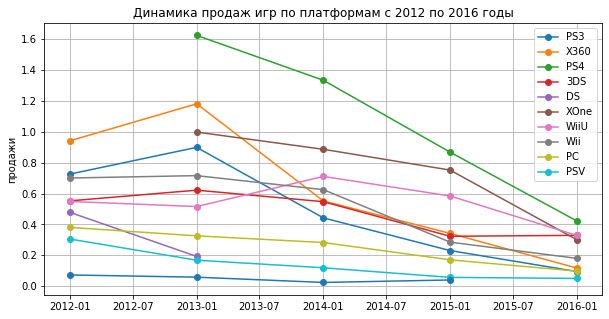

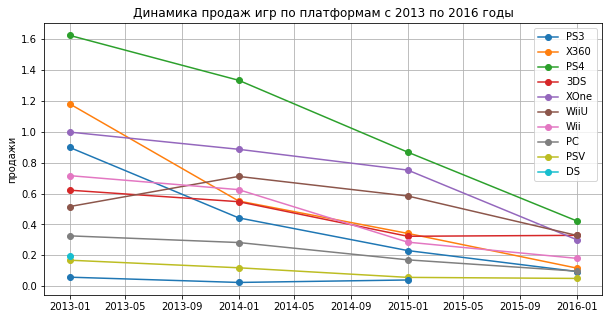

In [22]:
plt.figure(figsize=(10,5))
plt.grid()

for platform in df_actual['platform'].unique():
        plt.legend(df_actual['platform'].unique())
        plt.plot(df_actual[df_actual['platform'] == platform].pivot_table(
        index=['year_of_release'], values='total_sales'),marker='o')   
        plt.xlabel('')
plt.ylabel('продажи')
plt.title('Динамика продаж игр по платформам с 2012 по 2016 годы')
plt.show()
plt.figure(figsize=(10,5))
plt.grid()

for platform in df_actual_13['platform'].unique():
        plt.legend(df_actual_13['platform'].unique())
        plt.plot(df_actual_13[df_actual_13['platform'] == platform].pivot_table(
        index=['year_of_release'], values='total_sales'),marker='o')   
        plt.xlabel('')
plt.ylabel('продажи')
plt.title('Динамика продаж игр по платформам с 2013 по 2016 годы')
plt.show()

Мы наблюдаем падение продаж по всем платформам. Потенциально прибыльные платформы для следующего года: PS4, XOne, WiiU и 3DS. У всех них суммарные продажи по играм составляли выше 190 миллионов копий. По сравнению с остальными, их продажи падали менее резко и данные двух последних неполных лет немного выше, чем у остальных. После сравнения с актуальным периодом с 2013 года мы наболюдаем, что по поводу WiiU, появляются сомения, и возможно, ее не стоит включать в потенциально прибыльные платформы, так как она ближе к концу своего цикла, судя про продажам.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

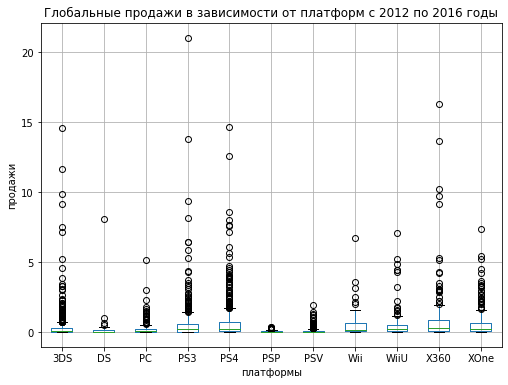

In [23]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
df_actual.boxplot(column=['total_sales'], by='platform',figsize=(8,6))
plt.ylabel('продажи')
plt.xlabel('платформы')
plt.title('Глоба6льные продажи в зависимости от платформ с 2012 по 2016 годы')
plt.suptitle("")
plt.show()

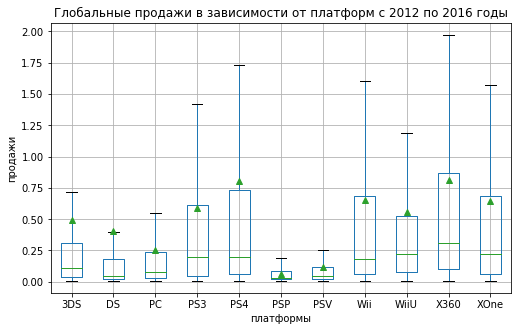

In [24]:
# добавим средние и уберем выбросы
df_actual.boxplot(column=['total_sales'], by='platform',figsize=(8,5), showmeans=True, showfliers=False )
plt.ylabel('продажи')
plt.xlabel('платформы')
plt.title('Глобальные продажи в зависимости от платформ с 2012 по 2016 годы')
plt.suptitle("")
plt.show()

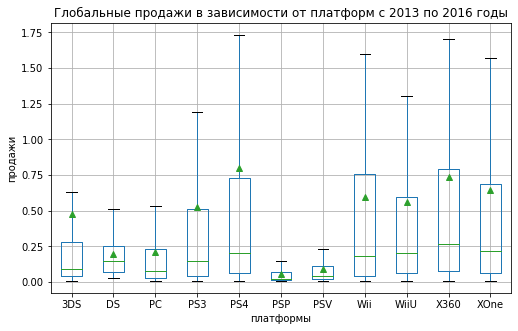

In [25]:
# повторим последний график для периода с 2013 года
df_actual_13.boxplot(column=['total_sales'], by='platform',figsize=(8,5), showmeans=True, showfliers=False )
plt.ylabel('продажи')
plt.xlabel('платформы')
plt.title('Глобальные продажи в зависимости от платформ с 2013 по 2016 годы')
plt.suptitle("")
plt.show()

На «ящиках с усами» по глобальным продажам игр в разбивке по платформам мы наблюдаем очень большое количество выбросов практически по всем платформам. Меньше выбросов видно на наименее прибыльных платформах,- PSP и DS, закончившие свои жизненные циклы в анализируем периоде, и PSV, близкая к концу жизненного цикла. Практически на всех платформах мы наблюдаем скос вправо.
Это также говорит о том, что продажи были неравномерны, одни игры продавались несравнимо больше, чем другие.

Если мы посмотрим на выделенные нами ранее как потенциально прибыльные платформы PS4, XOne, WiiU и 3DS,то после данных графиков, мы могли бы убрать из этого списка 3DS - ее "верхний ус" гораздо ниже остальных трех платформ, то есть основной массив дохода значительно меньше, чем у остальных платформ. * Это также может быть связано с тем, что это портативная консоль и, игры для нее дешевле.
Таким образом, пока что мы можем остановится на трех платформах, как потенциально приносящих доход PS4, XOne и WiiU.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [26]:
# сразу создадим функцию , которая будет печатать диаграммы рассеяния и считать корреляцию для популярных платформ 
# и применим ее для PS4 в этой части задания
def scatter(list):
    for topplatform in list:
            print('платформа', topplatform)
            df_actual_topplatform = df_actual[df_actual['platform']==topplatform]
            df_actual_topplatform.plot.scatter(y='total_sales', x='critic_score',alpha = 0.5)
            plt.ylabel('продажи')
            plt.xlabel('отзывы критиков')
            plt.title('Продажи игр в зависимости от отзывов экспертов')
            plt.show()
            df_actual_topplatform.plot.scatter(y='total_sales', x='user_score', alpha = 0.5)
            plt.ylabel('продажи')
            plt.xlabel('отзывы пользователей')
            plt.title('Продажи игр в зависимости от отзывов пользователей')
            plt.show()
            corr_sales_critics=df_actual_topplatform['total_sales'].corr(df_actual_topplatform['critic_score'])
            print('корреляция между отзывами критиков и продажами по платформе {}: {:.2f}'.format(topplatform, corr_sales_critics))
            corr_sales_users=df_actual_topplatform['total_sales'].corr(df_actual_topplatform['user_score'])
            print('корреляция между отзывами пользователей и продажами по платформе {}: {:.2f}'.format(topplatform, corr_sales_users))
            print('')

платформа PS4


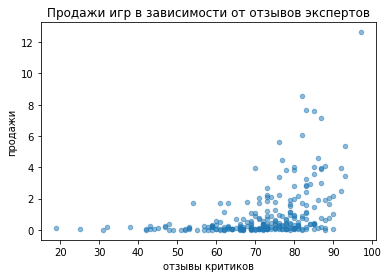

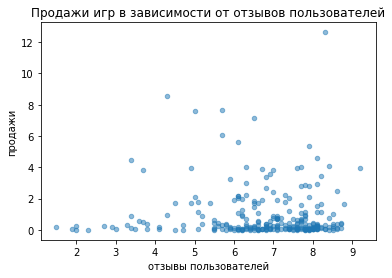

корреляция между отзывами критиков и продажами по платформе PS4: 0.41
корреляция между отзывами пользователей и продажами по платформе PS4: -0.03



In [27]:
scatter(['PS4'])

Рассмотрим продажи по платформе PS4. На диаграмма рассеяния мы видим, как с увеличением оценки экспертов увеличиваются продажи. Коэфвициент корреляции 0.41 подтверждает наличие положительной связи. Мы имеем  основания полагать, что высокая оценка экспертов позитивно влияет на продажи игр PS4.
Оценки пользователей же, не обнаруживают подобного поведения, и диаграмма рассеяния и коэффицент корреляции не позволяют говорить нам о связи меду оценкой пользователей и продажами. 

### Соотнесите выводы с продажами игр на других платформах.

платформа XOne


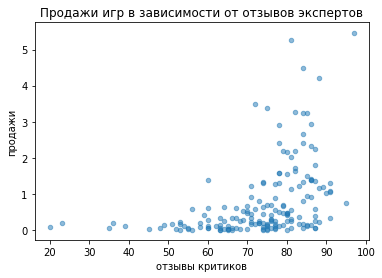

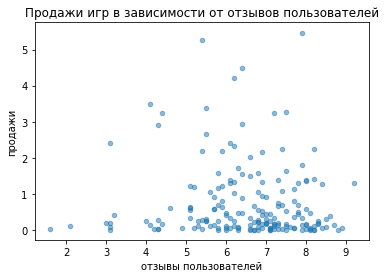

корреляция между отзывами критиков и продажами по платформе XOne: 0.42
корреляция между отзывами пользователей и продажами по платформе XOne: -0.07

платформа WiiU


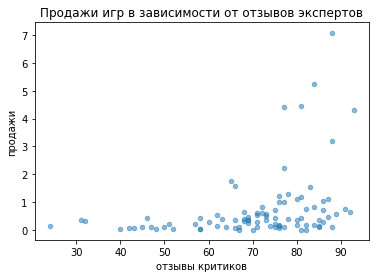

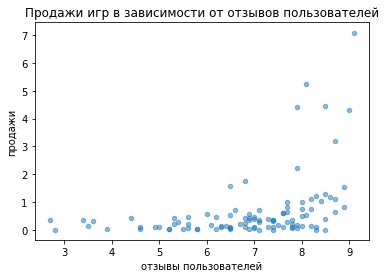

корреляция между отзывами критиков и продажами по платформе WiiU: 0.35
корреляция между отзывами пользователей и продажами по платформе WiiU: 0.40

платформа 3DS


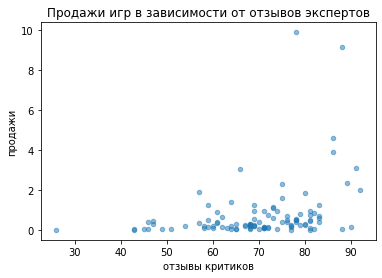

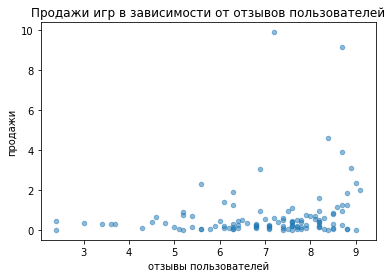

корреляция между отзывами критиков и продажами по платформе 3DS: 0.32
корреляция между отзывами пользователей и продажами по платформе 3DS: 0.20



In [28]:
# и применим теперь нашу функцию для других перспективных платформ 
scatter(['XOne', 'WiiU', '3DS'])

Сравним результаты с другими потенциально прибыльными платформами. Что касается корреляции продаж и отзывов экспертов, ситуация довольно схожая. Однако,коэфициент корреляции между экспертной оценкой и продажами  немного выше у XOne b PS4 (более 0.4), и немного ниже у 3DS и WiiU (но все же более 0.3, а сто быть, значимо)  что опять - таки подтверждает наличие положительной связи, но чуть менее сильной. 
Таким образом мы можем заключить, что оценка экспертов положительно коррелирует с продажами игр. Корреляция не говорит о том, что какая из величин влияет на другую. Однако, мы склонны полагать, что в данном случае оценки экспертов -независимая величина, которая влияет на зависимую - объем продаже. То есть, чем лучше отзывы экспертов, тем выше продажи. 

Оценка пользователей не коррелирует с продажами игр за исключением платформы WiiU, где коэффициент корреляции равен 0.4 (у 3DS она меньше 0.2). То есть для этой платформы, обнаруживается положительная корреляция между отзывами пользователей (в датасете их 100 по актуальному периоду) и продажами. 

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [29]:
# распределение количества игр в зависимости от жанра
total_games_genre=df_actual.pivot_table(
    index='genre', values='name',aggfunc=('count')).sort_values(by = 'name', ascending=False)
total_games_genre=total_games_genre.rename(columns={"name": "total_games"})
#total_games_genre.plot.bar(grid=True)

In [30]:
# распределение объема продаж в зависимости от жанра
total_sales_genre=df_actual.pivot_table(
    index='genre', values='total_sales',aggfunc=('sum')).sort_values(by = 'total_sales', ascending=False)
#total_sales_genre.plot.bar(grid=True)

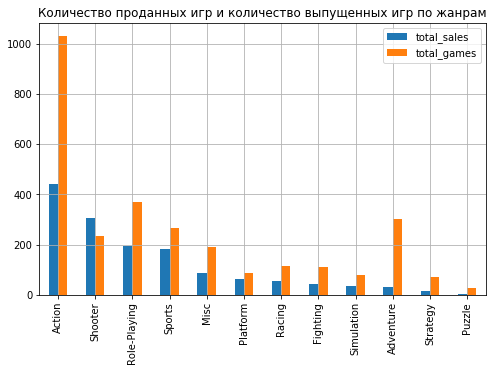

In [31]:
# создадим сводную таблицу и график, чтобы посмотреть  информацию по продажам, количество выпущенных игр в зависимости от жанра 
genre_sales_games=total_sales_genre.merge(total_games_genre, on='genre')
genre_sales_games[['total_sales','total_games']].plot.bar(
    figsize=(8,5), grid=True, title="Количество проданных игр и количество выпущенных игр по жанрам", 
)
plt.xlabel('')
plt.show()

In [32]:
# добавим столбец с отношением объема продаж к количеству игр
genre_sales_games['sales per game']=genre_sales_games['total_sales']/genre_sales_games['total_games']
genre_sales_games.sort_values(by = ['sales per game','total_sales'], ascending=False)

,total_sales,total_games,sales per game
genre,,,
Shooter,304.73,235,1.30
Platform,61.00,85,0.72
Sports,181.07,268,0.68
Role-Playing,192.80,370,0.52
Racing,53.50,115,0.47
Misc,85.04,192,0.44
Simulation,35.12,80,0.44
Action,441.12,1031,0.43
Fighting,44.49,109,0.41


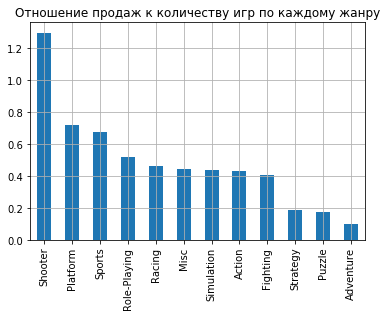

In [33]:
genre_sales_games['sales per game'].sort_values(ascending=False).plot.bar(
grid=True, title="Отношение продаж к количеству игр по каждому жанру", 
)
plt.xlabel('')
plt.show()

Жанр Action - лидер по объему продаж, однако в этом жанре было выпущено гораздо больше игр, чем в остальных жанрах. Значит, мы не можем говорить, что игра в жанре Action обязательно будет прибыльной. 

Посмотрим на отношение продаж к количеству игр по каждому жанру - sales per game - это по сути средняя выручка с одной игры по каждому жанру. Выше всего она у жанра Shooter, в среднем, каждая игра в этом жанре принесла 1.30 млн, а в Action только 0.43. Также мы можем выделить, как более прибыльные жанры Platform, Sports и Role-Playing, у них средняя выручка с игры более 0.5 млн. Наименее прибыльные жанры - Strategy, Puzzle и Adventure, с показателями ниже 0.2 по игре.

## Шаг 4. Составьте портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [34]:
df_na_sales = df_actual.groupby('platform')['na_sales'].agg(['sum'])
df_na_sales['sales_perc']=df_na_sales['sum']/df_na_sales['sum'].sum()*100
df_na_sales.sort_values(by = 'sales_perc', ascending=False).head(5)

,sum,sales_perc
platform,,
X360,140.05,23.70
PS4,108.74,18.40
PS3,103.38,17.49
XOne,93.12,15.76
3DS,55.31,9.36


In [35]:
df_eu_sales = df_actual.groupby('platform')['eu_sales'].agg(['sum'])
df_eu_sales['sales_perc']=df_eu_sales['sum']/df_eu_sales['sum'].sum()*100
df_eu_sales.sort_values(by = 'sales_perc', ascending=False).head(5)

,sum,sales_perc
platform,,
PS4,141.09,27.84
PS3,106.86,21.08
X360,74.52,14.70
XOne,51.59,10.18
3DS,42.64,8.41


In [36]:
df_jp_sales = df_actual.groupby('platform')['jp_sales'].agg(['sum'])
df_jp_sales['sales_perc']=df_jp_sales['sum']/df_jp_sales['sum'].sum()*100
df_jp_sales.sort_values(by = 'sales_perc', ascending=False).head(5)

,sum,sales_perc
platform,,
3DS,87.79,45.59
PS3,35.29,18.32
PSV,21.04,10.93
PS4,15.96,8.29
WiiU,13.01,6.76


Посмотрим то же самое для периода с 2013 года.

In [37]:
df_na_sales = df_actual_13.groupby('platform')['na_sales'].agg(['sum'])
df_na_sales['sales_perc']=df_na_sales['sum']/df_na_sales['sum'].sum()*100
df_na_sales.sort_values(by = 'sales_perc', ascending=False).head(5)

,sum,sales_perc
platform,,
PS4,108.74,24.84
XOne,93.12,21.27
X360,81.66,18.66
PS3,63.50,14.51
3DS,38.20,8.73


In [38]:
df_eu_sales = df_actual_13.groupby('platform')['eu_sales'].agg(['sum'])
df_eu_sales['sales_perc']=df_eu_sales['sum']/df_eu_sales['sum'].sum()*100
df_eu_sales.sort_values(by = 'sales_perc', ascending=False).head(5)

,sum,sales_perc
platform,,
PS4,141.09,35.97
PS3,67.81,17.29
XOne,51.59,13.15
X360,42.52,10.84
3DS,30.96,7.89


In [39]:
df_jp_sales = df_actual_13.groupby('platform')['jp_sales'].agg(['sum'])
df_jp_sales['sales_perc']=df_jp_sales['sum']/df_jp_sales['sum'].sum()*100
df_jp_sales.sort_values(by = 'sales_perc', ascending=False).head(5)

,sum,sales_perc
platform,,
3DS,67.81,48.17
PS3,23.35,16.59
PSV,18.59,13.21
PS4,15.96,11.34
WiiU,10.88,7.73


По нашему актульному периоду с 2012 года, по регионам, мы видим, что в Северной Америке лидирует X360, принадлежащая местной Microsoft, и скорее всего проводившая там наиболее агрессивную рекламу и первые продажи. Заметим, что на четвертом месте ее преемница, XOne, начавшая свой жизненный цикл в 2013 году. Второе и третье место в Америке совпадают с первым и вторым в Европе - это PS4 и предыдущая PS3, принадлежащие японской Sony. А если брать период с 2013 года, то PS4 уже лидирует, заняв первое место в обоих регионах.
В Европе, видимо, любовь к этой японской марке была сильнее в том числе благодаря тому, что они раньше вышли на рынок и были гораздо лучше знакомы европейскому пользователю.

На пятом месте в Америке и Европе с продажами меньше 10% находится топ японских продаж - 3DS. В Японии - это абсолютный лидер, 46% проданных игр пришлись на эту платформу, принадлежащюю японской Nintendo. Интересно, что это портативная игровая система - которую обычно берут собой. Третья по популярности платформа в Японии - это PSV, также портативная консоль, только от Sony. То есть более половины всех проданных игр в Японии были для портативных консолей. Японцы довольно знамениты тем, что проводят много времени в транспорте, возможно, это ответ на вопрос о популярности этих двух платформ - их портативность, приспособленная под японские будни. Второе и четвертое места достались местным и, как мы видели, популярным в двух других регионах,- PS3 и PS4 от Sony, главного конкурента  Nintendo. Помимо первого места Nintendo также захватило пятое место в Японии с другим продуктом, WiiU, для домашнего использования. Это единственный регион, где WiiU попало в пятерку самых популяных платформ с самой маленькой долей. Поэтому, на этом этапе мы можем отказаться от данной платформы как потенциально прибыльной.

### Определите для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Поясните разницу.

In [40]:
df_na_genre = df_actual.groupby('genre')['na_sales'].agg(['sum'])
df_na_genre['genre_perc']=df_na_genre['sum']/df_na_genre['sum'].sum()*100
df_na_genre.sort_values(by = 'genre_perc', ascending=False).head(5)

,sum,genre_perc
genre,,
Action,177.84,30.09
Shooter,144.77,24.50
Sports,81.53,13.80
Role-Playing,64.00,10.83
Misc,38.19,6.46


In [41]:
df_eu_genre = df_actual.groupby('genre')['eu_sales'].agg(['sum'])
df_eu_genre['genre_perc']=df_eu_genre['sum']/df_eu_genre['sum'].sum()*100
df_eu_genre.sort_values(by = 'genre_perc', ascending=False).head(5)

,sum,genre_perc
genre,,
Action,159.34,31.44
Shooter,113.47,22.39
Sports,69.09,13.63
Role-Playing,48.53,9.58
Racing,27.29,5.38


In [42]:
df_jp_genre = df_actual.groupby('genre')['jp_sales'].agg(['sum'])
df_jp_genre['genre_perc']=df_jp_genre['sum']/df_jp_genre['sum'].sum()*100
df_jp_genre.sort_values(by = 'genre_perc', ascending=False).head(5)

,sum,genre_perc
genre,,
Role-Playing,65.44,33.98
Action,52.80,27.42
Misc,12.86,6.68
Simulation,10.41,5.41
Fighting,9.44,4.90


По жанрам Европа и Северная Америка схожи в предпочтениях: лидирует Action, Shooter, Sports и Role-Playing. В Японии же
на первом месте Role-Playing, на втором Action, лидирующий в других двух регионах. Опять таки, разница, возможно, объясняется культурными особенностями и более замкнутым образом жизни.
Следующие по популярности в Японии позиции, составляющие около 5%, это неопределенный Misc (все, что не принадлежит другим жанром), Simulation и Fighting. Видно, что Япония отличается по вкусам от Севереной Америки и Европы, и вместо спортивных игр предпочитает симуляции и боевые искусства. 

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [43]:
df_na_rating = df_actual.groupby('rating')['na_sales'].agg(['sum'])
df_na_rating['rating_perc']=df_na_rating['sum']/df_na_rating['sum'].sum()*100
df_na_rating.sort_values(by = 'rating_perc', ascending=False)

,sum,rating_perc
rating,,
M,231.57,39.18
E,114.37,19.35
undefined,103.31,17.48
E10+,75.70,12.81
T,66.02,11.17


In [44]:
df_eu_rating = df_actual.groupby('rating')['eu_sales'].agg(['sum'])
df_eu_rating['rating_perc']=df_eu_rating['sum']/df_eu_rating['sum'].sum()*100
df_eu_rating.sort_values(by = 'rating_perc', ascending=False)

,sum,rating_perc
rating,,
M,193.96,38.27
E,113.03,22.30
undefined,91.50,18.05
E10+,55.37,10.92
T,52.96,10.45


In [45]:
df_jp_rating = df_actual.groupby('rating')['jp_sales'].agg(['sum'])
df_jp_rating['rating_perc']=df_jp_rating['sum']/df_jp_rating['sum'].sum()*100
df_jp_rating.sort_values(by = 'rating_perc', ascending=False)

,sum,rating_perc
rating,,
undefined,108.84,56.52
E,28.33,14.71
T,26.02,13.51
M,21.20,11.01
E10+,8.19,4.25


In [46]:
# здесь мы попробовали создать шкалу по возрасту, согласно рейтингу, где 0 - неопределенный жанр, 1 - для всех, а 4-для взрослых и посмотреть корреляцию
# по продажам и отдельно по регионам - нигде не вышло существенного значения коэфициента корреляции, все они меньше 0.1
df['rating_sc']=df['rating']

In [47]:
df.loc[df['rating_sc'] == 'undefined', 'rating_sc'] = 0
df.loc[df['rating_sc'] == 'E', 'rating_sc'] = 1
df.loc[df['rating_sc'] == 'E10+', 'rating_sc'] = 2
df.loc[df['rating_sc'] == 'T', 'rating_sc'] = 3
df.loc[df['rating_sc'] == 'M', 'rating_sc'] = 4

In [48]:
df['rating_sc']=pd.to_numeric(df['rating_sc'], errors='coerce') 
df_actual=df[df['year_of_release'] >= pd.Timestamp(2012,1,1)]

In [49]:
print('корреляция между рейтингом и глобальными продажами {:.2f}'.format(
    df_actual['total_sales'].corr(df_actual['rating_sc'])))
print('корреляция между рейтингом и продажами в Севреной Америке {:.2f}'.format(
    df_actual['na_sales'].corr(df_actual['rating_sc'])))
print('корреляция между рейтингом и продажами в Европе {:.2f}'.format(
    df_actual['eu_sales'].corr(df_actual['rating_sc'])))
print('корреляция между рейтингом и продажами в Японии {:.2f}'.format(
    df_actual['jp_sales'].corr(df_actual['rating_sc'])))

корреляция между рейтингом и глобальными продажами 0.18
корреляция между рейтингом и продажами в Севреной Америке 0.20
корреляция между рейтингом и продажами в Европе 0.18
корреляция между рейтингом и продажами в Японии -0.07


Снова по Европе и Америке данные довольно близки: почти 40% пришлось на M - контент для взрослых пользователей. На втором месте в Америке и Европе категория  E - для всех,  коло 20% продаж. И на третьем - игры по которым отсутствиует категория, около 18%.

Японии на эту неопределенную категорию пришлось больше всего продаж, 57%, а на  M, для взрослых, - только 11%, она не входит в тройку самых продаваемых. 15% продаж в Японии на E - для всех, 14% приходится на категорию T - подростки старше 13 лет. 

Мы можем предполагать, что я Японии немного более сегментирован рынок по категориям рейтинга, и, по идее, возраста. Возможно, это связано с тем, что продажа видеоигр более сильно регулируется в зависимости от возрастной категории именно там, и игры без категории, таким образом, могут быть популярны т.к. доступны всем для покупки. Возможно, в Америке и Европе подросткам проще купить игры категории M. 
Для того, чтобы посмотреть есть ли связь между рейтингом и продажами, мы попробовали создать шкалу (это не интервальная шкала, а номинальная (впрочем, можно подумать, является ли она порядковой)) и посчитать корреляцию между рейтингом и глобальными продажами и продажами по регионам. Значения болучились 0.2 и меньше, поэтому мы не можем утверждать о связи.

## Шаг 5. Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуемся методом scipy.stats.ttest_ind. Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны, альтернативная - рейтинги не равны.

In [50]:
user_score_XOne=df_actual[df_actual['platform']=='XOne']['user_score']
user_score_PC=df_actual[df_actual['platform']=='PC']['user_score']
user_score_XOne_mean=user_score_XOne.mean()
user_score_PC_mean=user_score_PC.mean()
print(f'Средний пользовательский рейтинг платформ Xbox {user_score_XOne_mean:.2f}')
print(f'Средний пользовательский рейтинг платформы PC {user_score_PC_mean:.2f}')


alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотез

results = st.ttest_ind(user_score_XOne, user_score_PC, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средний пользовательский рейтинг платформ Xbox 6.52
Средний пользовательский рейтинг платформы PC 6.43
p-значение: 0.5535080500642724
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC по нашим данным имеют небольшое различие. Наша гипотеза - что рейтинги одинаковые и такое различие не существенно.
Полученное значение p-value говорит о том, что с вероятностью более 55% такое или большее различие между средними рейтингами можно получить случайно. Поэтому, мы не отвергаем нулевую гипотезу и не имеем основания полагать о значимом различии между средними пользовательскими рейтингами платформ Xbox One и PC.

### Средние пользовательские рейтинги жанров Action  и Sports разные. 

Здесь нам также нужно проверить гипотезу о равенстве среднего двух генеральных совокупностей пользователей Action и Sports, по выборкам, которые у нас есть. Нулевая гипотеза должна утверждать, что между между средними рейтингами игроков  Action и Sports разницы нет. Альтернативная - что средние пользовательские рейтинги этих двух анров разные.

In [51]:
user_score_Action=df_actual[df_actual['genre']=='Action']['user_score']
user_score_Sports=df_actual[df_actual['genre']=='Sports']['user_score']
user_score_Action_mean=user_score_Action.mean()
user_score_Sports_mean=user_score_Sports.mean()
print(f'Средний пользовательский рейтинг жанра Action {user_score_Action_mean:.2f}')
print(f'Средний пользовательский рейтинг жанра Sports {user_score_Sports_mean:.2f}')

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотез

results = st.ttest_ind(user_score_Action, user_score_Sports, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средний пользовательский рейтинг жанра Action 6.83
Средний пользовательский рейтинг жанра Sports 5.46
p-значение: 3.716308946093586e-26
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу о равенстве средних. Полученное значение p-value (это очень маленькое число, близкое к нулю) говорит, что различие средних рейтингов по данным двум жанром - неслучайно. Таким образом, мы можем утверждать о значимом различии между средними рейтингами по жанру Action и Sports.

## Выводы

Итак, после проведенного анализа, нам необходимо принять решение о том, какие потенциально популярные игры будет продавать наш интернет-магазин, работающий по всему миру, в 2017 году. Сформулируем требования для закупки игр:

- Игры должны быть для платформ PS4, XOne и WiiU. Мы решили, что это потенциально успешные платформы, продолжающие свой жизненный цикл, составляющий, как правило, около 10 лет. 
- Мы не будем ориентироваться на игры для портативной консоли 3DS, наиболее популярной прежде всего в Японии. Ее игры в среднем приносят меньше дохода. Японцы, как основные потенциальные потребители, к тому же, врядли будут заказывать игры для японской же платформы в зарубежном интернет-магазине.
- Игры должны иметь высокие оценки критиков. Мы обнаружили корреляцию между рейтингом экспертов и объемом продаж. Рейтинг пользователей не имеет большого значения.
- Игры должны  быть в жанрах Shooter, Platform, Sports и Role-Playing. Это необходимо, чтобы гарантировать высокую среднюю выручку. Это же и одни из самых популярных жанров в Америке и Европе. 
- Action также очень популярный жанр, но выбирать в нем игры нужно с особым внимание. Нужно заручиться как минимум высокими отзывами критиков, т.к. игр в этом жанре выпусают очень много, и далеко не все будут прибыльны.
- Желательно, чтобы игры были с рейтингом M - для взрослой аудитории,  E - то есть для всех, или, чтобы были вовсе без рейтинга. Эти рейтинги наиболее популярны.